# Sperimentazione tesi

In [8]:
import pandas as pd
import seaborn as sns #Visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

medical = pd.read_csv('insurance.csv')
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


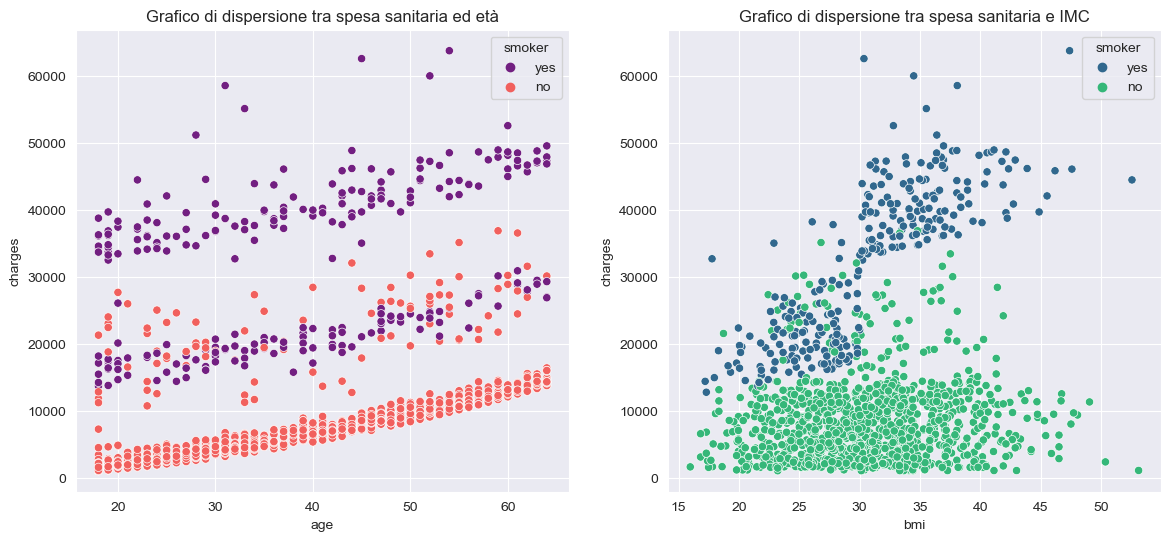

In [10]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=medical,palette='magma',hue='smoker',ax=ax)
ax.set_title('Grafico di dispersione tra spesa sanitaria ed età')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=medical,palette='viridis',hue='smoker')
ax.set_title('Grafico di dispersione tra spesa sanitaria e IMC')
plt.savefig('sc.png');

In [13]:
# Utilizziamo get_dummies solo per 'smoker'
medical['smoker'] = pd.get_dummies(medical['smoker'], drop_first=True)  # "no" diventa 0 e "yes" diventa 1

# Definiamo la variabile indipendente (smoker) e la variabile dipendente (charges)
X = medical[['smoker']].values  # Manteniamo solo la colonna 'smoker'
Y = medical['charges'].values

# Suddividiamo il dataset in training e test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Inizializziamo il modello di regressione lineare
ll = LinearRegression()
ll.fit(X_train, Y_train)  # Addestriamo il modello

# Facciamo previsioni sui dati di test
Y_pred = ll.predict(X_test)

# Calcolo dell'MSE e R2
MSE = mean_squared_error(Y_test, Y_pred)
print("Errore quadratico medio: " + str(MSE))

R2S = r2_score(Y_test, Y_pred)
print("Valore di R2 (standardizzazione dell'MSE): " + str(R2S))

Errore quadratico medio: 52745964.72752624
Valore di R2 (standardizzazione dell'MSE): 0.6602486589056529
